In [1]:
import os,shutil

In [5]:
original_dataset_dir = 'C://Users/Ahmed/Downloads/all/train'

base_dir = 'C://Users/Ahmed/Downloads/cats_and_dogs_small'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dest)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dest)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dest)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dest)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dest)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [6]:
print('total files : ',len(os.listdir(train_cats_dir)))
print('total files : ',len(os.listdir(train_dogs_dir)))
print('total files : ',len(os.listdir(validation_cats_dir)))
print('total files : ',len(os.listdir(validation_dogs_dir)))
print('total files : ',len(os.listdir(test_cats_dir)))
print('total files : ',len(os.listdir(test_dogs_dir)))

total files :  1000
total files :  1000
total files :  500
total files :  500
total files :  500
total files :  500


In [7]:
from keras import models,layers,optimizers

Using TensorFlow backend.


In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

val_datagenerator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch,label_batch in train_datagenerator:
    print('data batch size : ',data_batch.shape)
    print('label batch size : ',label_batch.shape)
    break

data batch size :  (20, 150, 150, 3)
label batch size :  (20,)


In [ ]:
history = model.fit_generator(train_datagenerator, steps_per_epoch=100, epochs=30, 
                              validation_data=val_datagenerator, validation_steps=50)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [12]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

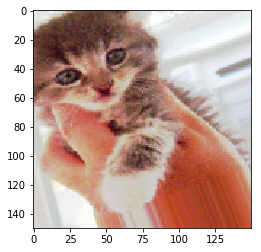

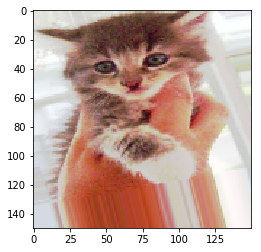

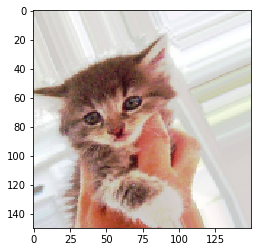

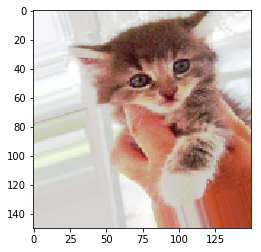

In [25]:
from keras.preprocessing import image
import numpy as np

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img).astype(np.uint8)
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    z = image.img_to_array(batch[0])
#     z = (z*255).astype(np.uint8)
    imgplot = plt.imshow(z.astype(np.uint8))
    i += 1
    if i%4==0:
        break
    

In [26]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    height_shift_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    shear_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_datagenerator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

val_datagenerator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(train_datagenerator, steps_per_epoch=100, epochs=30, 
                              validation_data=val_datagenerator, validation_steps=50)

model.save('cvsd.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 272s 3s/step - loss: 0.6936 - acc: 0.5031 - val_loss: 0.6824 - val_acc: 0.5768
Epoch 2/30
100/100 [==============================] - 286s 3s/step - loss: 0.6792 - acc: 0.5603 - val_loss: 0.6781 - val_acc: 0.5546
Epoch 3/30
100/100 [==============================] - 290s 3s/step - loss: 0.6689 - acc: 0.5925 - val_loss: 0.6468 - val_acc: 0.6072
Epoch 4/30
100/100 [==============================] - 290s 3s/step - loss: 0.6609 - acc: 0.6041 - val_loss: 0.6595 - val_acc: 0.5926
Epoch 5/30
100/100 [==============================] - 288s 3s/step - loss: 0.6470 - acc: 0.6259 - val_loss: 0.6083 - val_acc: 0.6593
Epoch 6/30
100/100 [==============================] - 288s 3s/step - loss: 0.6288 - acc: 0.6466 - val_loss: 0.6392 - val_acc: 0.6409
Epoch 7/30
100/100 [==============================] - 289s 3s/step - loss: 0.6216 - acc: 0.6525 - val_loss: 0.5857 - v

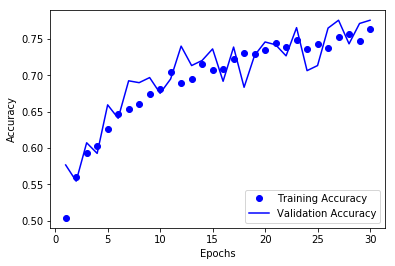

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.legend()

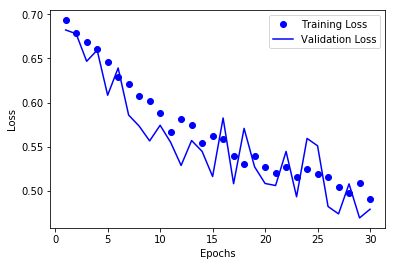

In [30]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()